### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 6


### Дисциплина: Методы машинного обучения

## Москва 2022
***

### Вариант № 14

1.	Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import tensorflow as tf
import tensorflow_datasets as tfds
df_train = tfds.as_dataframe(tfds.load("stl10", split=['train','test'])[0])
df_test  = tfds.as_dataframe(tfds.load("stl10", split=['train','test'])[1])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stl10/1.0.0.incomplete3H4DVI/stl10-train.tfrecord


  0%|          | 0/5000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stl10/1.0.0.incomplete3H4DVI/stl10-test.tfrecord


  0%|          | 0/8000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stl10/1.0.0.incomplete3H4DVI/stl10-unlabelled.tfrecord


  0%|          | 0/100000 [00:00<?, ? examples/s]

Dataset stl10 downloaded and prepared to /root/tensorflow_datasets/stl10/1.0.0. Subsequent calls will reuse this data.


2. Визуализируйте несколько изображений, отобранных случайным образом из обучающей выборки.

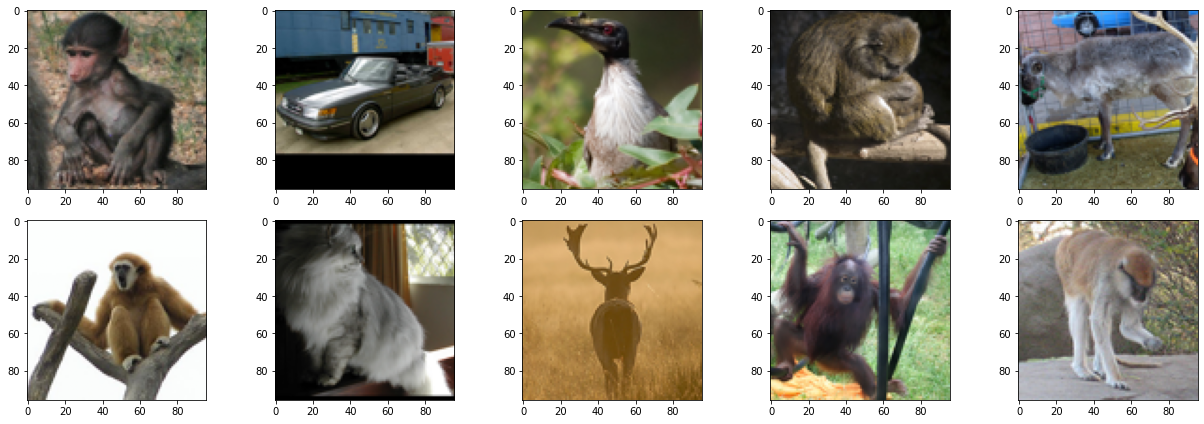

In [3]:
import random
from PIL import Image, ImageOps
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_images = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],96,96,3), dtype=np.float32)
train_images = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],96,96,3), dtype=np.float32)
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx]['image']))
for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx]['image']))
train_images /= 255
test_images  /= 255
def plot_random_sample(images):
    n = 10
    imgs = random.sample(list(images), n)
    num_row = 2
    num_col = 5
    fig, axes = plt.subplots(num_row, num_col, figsize=(3.5 * num_col, 3 * num_row))
    for i in range(num_row * num_col):
        img = imgs[i] 
        ax = axes[i // num_col, i % num_col]
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
plot_random_sample(test_images)

3.	Оставьте в наборе изображения двух классов, указанных в индивидуальном задании первыми. Обучите нейронные сети MLP и CNN задаче бинарной классификации изображений (архитектура сетей по вашему усмотрению). Количество эпох обучения указано в индивидуальном задании. 


In [4]:
df_train1,df_test1 = [],[]
for i in df_train.values:
  if i[1] in (4,5):
    df_train1.append(i)
df_train = pd.DataFrame(df_train1)
for i in df_test.values:
  if i[1] in (4,5):
    df_test1.append(i)
df_test = pd.DataFrame(df_test1)
train_labels = df_train[1].to_numpy(dtype=np.float32)
test_labels = df_test[1].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape
train_images = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],96,96,3), dtype=np.float32)
train_images = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],96,96,3), dtype=np.float32)
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx][0]))
for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx][0]))
train_images /= 255
test_images  /= 255
train_labels1 = []
for i in train_labels:
  if i==4:
    train_labels1.append(0)
  else:
    train_labels1.append(1)
train_labels = train_labels1

test_labels1 = []
for i in test_labels:
  if i==4:
    test_labels1.append(0)
  else:
    test_labels1.append(1)
test_labels = test_labels1
np.unique(test_labels)    
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([tf.keras.layers.Input(shape=(96, 96, 3)),
                               tf.keras.layers.Flatten(),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(1, activation='sigmoid')])
model_1.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
history_1 = model_1.fit(train_images,np.array(train_labels),
                        epochs=20,
                        batch_size=256,
                        validation_data=(test_images, np.array(test_labels)))

Epoch 1/20
4/4 [==============================] - 3s 565ms/step - loss: 7.4788 - accuracy: 0.5030 - val_loss: 2.9873 - val_accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 1s 347ms/step - loss: 6.2322 - accuracy: 0.4870 - val_loss: 1.5987 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 1s 333ms/step - loss: 2.5050 - accuracy: 0.4870 - val_loss: 3.2543 - val_accuracy: 0.5006
Epoch 4/20
4/4 [==============================] - 1s 373ms/step - loss: 2.4025 - accuracy: 0.5330 - val_loss: 1.7485 - val_accuracy: 0.5081
Epoch 5/20
4/4 [==============================] - 1s 321ms/step - loss: 1.8519 - accuracy: 0.5320 - val_loss: 1.7445 - val_accuracy: 0.5131
Epoch 6/20
4/4 [==============================] - 1s 240ms/step - loss: 1.6975 - accuracy: 0.5330 - val_loss: 2.1869 - val_accuracy: 0.5188
Epoch 7/20
4/4 [==============================] - 1s 198ms/step - loss: 1.6601 - accuracy: 0.5490 - val_loss: 0.9653 - val_accuracy: 0.5738
Epoch 8/20
4/4 [====

In [5]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), input_shape=(96, 96, 3),
                           activation='relu'),tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),tf.keras.layers.Flatten(),tf.keras.layers.Dropout(rate=0.3),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')]
)
history_2 = model_2.fit(train_images,np.array(train_labels),
                        epochs=20,
                        batch_size=256,
                        validation_data=(test_images, np.array(test_labels)))

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 0.8427 - accuracy: 0.5110 - val_loss: 0.6911 - val_accuracy: 0.5050
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 0.6884 - accuracy: 0.5190 - val_loss: 0.6994 - val_accuracy: 0.5000
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6884 - accuracy: 0.5000 - val_loss: 0.6828 - val_accuracy: 0.5000
Epoch 4/20
4/4 [==============================] - 10s 3s/step - loss: 0.6742 - accuracy: 0.5110 - val_loss: 0.6735 - val_accuracy: 0.5381
Epoch 5/20
4/4 [==============================] - 9s 3s/step - loss: 0.6624 - accuracy: 0.5310 - val_loss: 0.6659 - val_accuracy: 0.5756
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.6506 - accuracy: 0.6050 - val_loss: 0.6554 - val_accuracy: 0.6600
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.6356 - accuracy: 0.7040 - val_loss: 0.6419 - val_accuracy: 0.6612
Epoch 8/20
4/4 [========================

4.	Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.


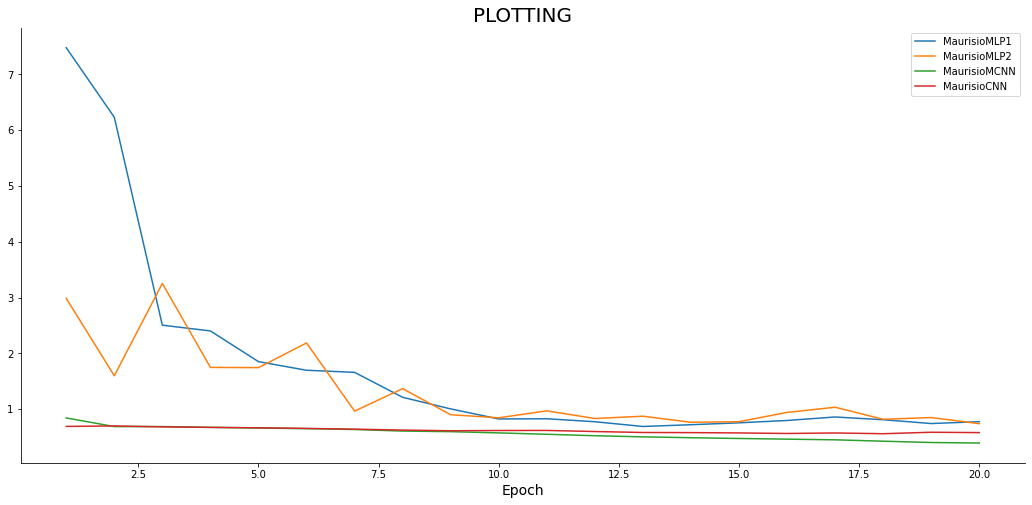

In [6]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 21), history_1.history['loss'], label='MaurisioMLP1')
plt.plot(np.arange(1, 21), history_1.history['val_loss'], label='MaurisioMLP2')
plt.plot(np.arange(1, 21), history_2.history['loss'], label='MaurisioMCNN')
plt.plot(np.arange(1, 21), history_2.history['val_loss'], label='MaurisioCNN')
plt.title('PLOTTING', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();



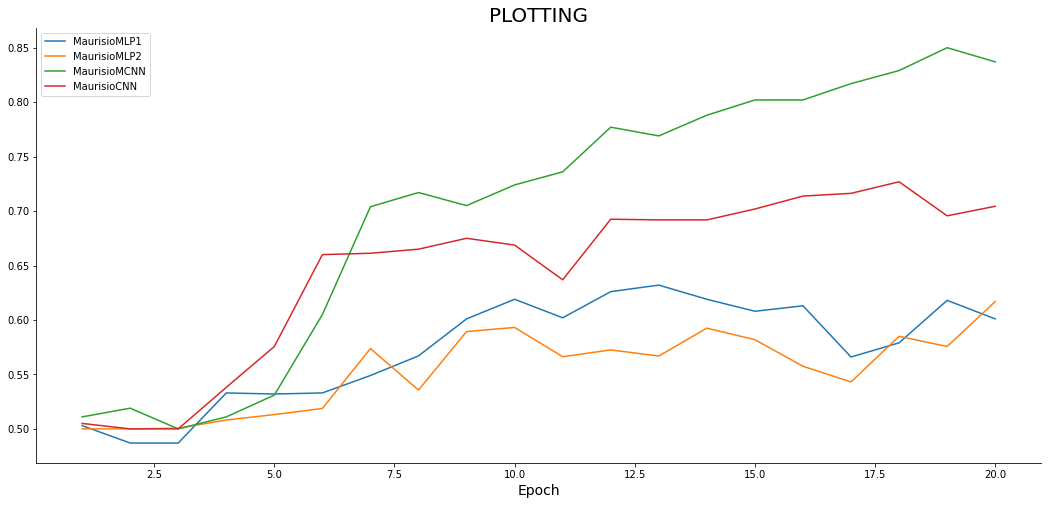

In [7]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 21), history_1.history['accuracy'], label='MaurisioMLP1')
plt.plot(np.arange(1, 21), history_1.history['val_accuracy'], label='MaurisioMLP2')
plt.plot(np.arange(1, 21), history_2.history['accuracy'], label='MaurisioMCNN')
plt.plot(np.arange(1, 21), history_2.history['val_accuracy'], label='MaurisioCNN')
plt.title('PLOTTING', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

5.	Сравните качество бинарной классификации нейронными сетями при помощи матрицы ошибок для тестовой выборки. 


In [8]:
print (confusion_matrix(test_labels, np.round(abs(model_1.predict(test_images)))))
confusion_matrix(test_labels, np.round(abs(model_2.predict(test_images))))

[[650 150]
 [463 337]]


array([[677, 123],
       [350, 450]])

6.	Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) и вычислите площади под ROC-кривыми.


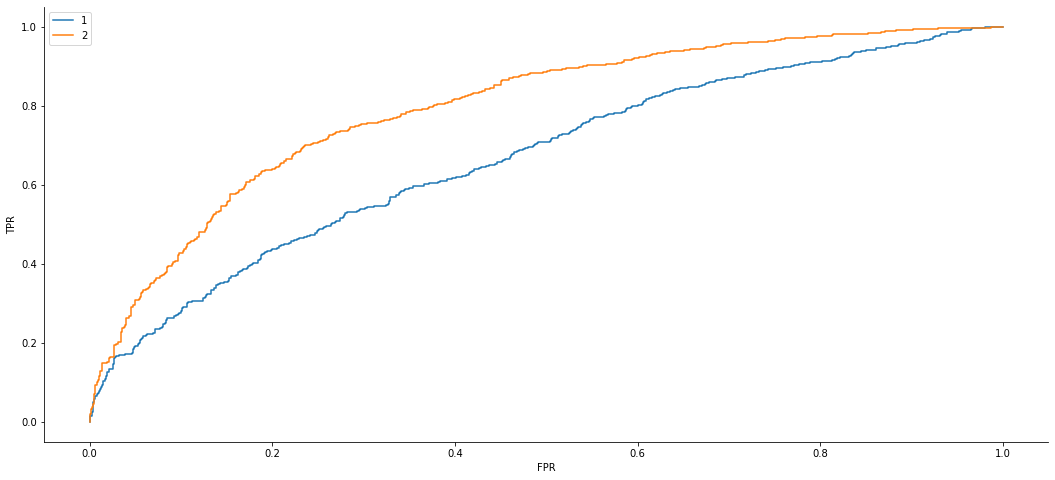

In [9]:
fpr, tpr, _ = metrics.roc_curve(test_labels, model_1.predict(test_images), pos_label=1)
fpr1, tpr1, _ = metrics.roc_curve(test_labels, model_2.predict(test_images), pos_label=1)
plt.plot(fpr,tpr, label='1')
plt.plot(fpr1,tpr1, label='2')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.legend()
plt.show()

In [10]:
auc = metrics.roc_auc_score(test_labels, model_1.predict(test_images))
print (auc)
auc = metrics.roc_auc_score(test_labels, model_2.predict(test_images))
auc

0.6685109375


0.7947421875

7.	Оставьте в наборе изображения трех классов, указанных в индивидуальном задании. Обучите нейронные сети MLP и CNN задаче многоклассовой классификации изображений (архитектура сетей по вашему усмотрению). Количество эпох обучения указано в индивидуальном задании. 


In [12]:
df_train = tfds.as_dataframe(tfds.load("stl10", split=['train','test'])[0])
df_test  = tfds.as_dataframe(tfds.load("stl10", split=['train','test'])[1])
df_train1 = []
for i in df_train.values:
  if i[1] in (4,5,6):
    df_train1.append(i)
df_train = pd.DataFrame(df_train1)
df_test1 = []
for i in df_test.values:
  if i[1] in (4,5,6):
    df_test1.append(i)
df_test = pd.DataFrame(df_test1)

train_labels = df_train[1].to_numpy(dtype=np.float32)
test_labels = df_test[1].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape
train_images = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],96,96,3), dtype=np.float32)
train_images.shape, test_images.shape
train_images = np.zeros(shape=(df_train.shape[0],96,96,3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0],96,96,3), dtype=np.float32)
train_images.shape, test_images.shape
for idx in range(train_labels.shape[0]):
    train_images[idx,:,:,:] = np.array(Image.fromarray(df_train.iloc[idx][0]))
for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = np.array(Image.fromarray(df_test.iloc[idx][0]))
train_images.shape, test_images.shape
train_images /= 255
test_images  /= 255

train_labels1 = []
for i in train_labels:
  if i==4:
    train_labels1.append(0)
  elif i==5:
    train_labels1.append(1)
  else:
    train_labels1.append(2)
train_labels = train_labels1

test_labels1 = []
for i in test_labels:
  if i==4:
    test_labels1.append(0)
  elif i==5:
    test_labels1.append(1)
  else:
    test_labels1.append(2)
test_labels = test_labels1

In [13]:
def to_one_hot(labels, dimension=11):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
train_labels = to_one_hot(train_labels, 3)
test_labels = to_one_hot(test_labels,3)

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(96, 96, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')])
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
history_1 = model_1.fit(train_images,
                        train_labels,epochs=20,
                        batch_size=256,
                        validation_data=(test_images, test_labels))

Epoch 1/20
6/6 [==============================] - 4s 392ms/step - loss: 15.8309 - accuracy: 0.5647 - val_loss: 12.1657 - val_accuracy: 0.5556
Epoch 2/20
6/6 [==============================] - 1s 260ms/step - loss: 7.2502 - accuracy: 0.5693 - val_loss: 4.1874 - val_accuracy: 0.5617
Epoch 3/20
6/6 [==============================] - 2s 314ms/step - loss: 2.3687 - accuracy: 0.5809 - val_loss: 1.0987 - val_accuracy: 0.6575
Epoch 4/20
6/6 [==============================] - 2s 283ms/step - loss: 1.2726 - accuracy: 0.6120 - val_loss: 1.0930 - val_accuracy: 0.6603
Epoch 5/20
6/6 [==============================] - 2s 285ms/step - loss: 1.1802 - accuracy: 0.6427 - val_loss: 1.0880 - val_accuracy: 0.6674
Epoch 6/20
6/6 [==============================] - 2s 316ms/step - loss: 1.1021 - accuracy: 0.6624 - val_loss: 1.0845 - val_accuracy: 0.6640
Epoch 7/20
6/6 [==============================] - 1s 234ms/step - loss: 1.0719 - accuracy: 0.6702 - val_loss: 1.0799 - val_accuracy: 0.6679
Epoch 8/20
6/6 [==

In [14]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=8,
                                                      kernel_size=(3, 3), input_shape=(96, 96, 3), activation='relu'),tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),tf.keras.layers.Flatten(),tf.keras.layers.Dropout(rate=0.3),tf.keras.layers.Dense(128, activation='relu'),tf.keras.layers.Dense(3, activation='softmax')])
model_2.compile(loss=tf.keras.losses.categorical_crossentropy
                ,optimizer=tf.keras.optimizers.Adam(),metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])
history_2 = model_2.fit(train_images,
                        train_labels,epochs=20,batch_size=256,validation_data=(test_images, test_labels))

Epoch 1/20
6/6 [==============================] - 10s 2s/step - loss: 1.7912 - accuracy: 0.6220 - val_loss: 1.1112 - val_accuracy: 0.6667
Epoch 2/20
6/6 [==============================] - 10s 2s/step - loss: 1.0989 - accuracy: 0.6669 - val_loss: 1.0879 - val_accuracy: 0.6667
Epoch 3/20
6/6 [==============================] - 9s 2s/step - loss: 1.0771 - accuracy: 0.6671 - val_loss: 1.0683 - val_accuracy: 0.6667
Epoch 4/20
6/6 [==============================] - 11s 2s/step - loss: 1.0586 - accuracy: 0.6704 - val_loss: 1.0487 - val_accuracy: 0.6778
Epoch 5/20
6/6 [==============================] - 10s 2s/step - loss: 1.0374 - accuracy: 0.6842 - val_loss: 1.0267 - val_accuracy: 0.6799
Epoch 6/20
6/6 [==============================] - 9s 2s/step - loss: 1.0234 - accuracy: 0.6860 - val_loss: 1.0118 - val_accuracy: 0.6867
Epoch 7/20
6/6 [==============================] - 9s 2s/step - loss: 1.0079 - accuracy: 0.6942 - val_loss: 1.0103 - val_accuracy: 0.6907
Epoch 8/20
6/6 [=====================

8.	Сравните качество многоклассовой классификации нейронными сетями при помощи матрицы ошибок (для трех классов) для тестовой выборки. 


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels.argmax(axis=1), model_1.predict(test_images).argmax(axis=1))

array([[628,  98,  74],
       [509, 130, 161],
       [347, 142, 311]])

In [16]:
confusion_matrix(test_labels.argmax(axis=1), model_2.predict(test_images).argmax(axis=1))

array([[391, 235, 174],
       [174, 315, 311],
       [ 48, 136, 616]])

9.	Постройте кривые обучения нейронных сетей для показателей ошибки и аккуратности в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду.


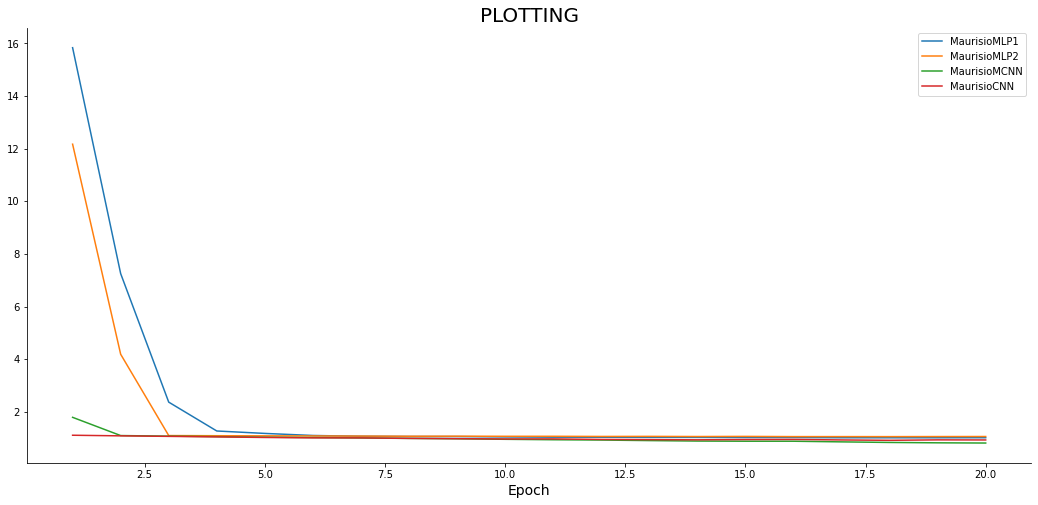

In [17]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 21), history_1.history['loss'], label='MaurisioMLP1')
plt.plot(np.arange(1, 21), history_1.history['val_loss'], label='MaurisioMLP2')
plt.plot(np.arange(1, 21), history_2.history['loss'], label='MaurisioMCNN')
plt.plot(np.arange(1, 21), history_2.history['val_loss'], label='MaurisioCNN')
plt.title('PLOTTING', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

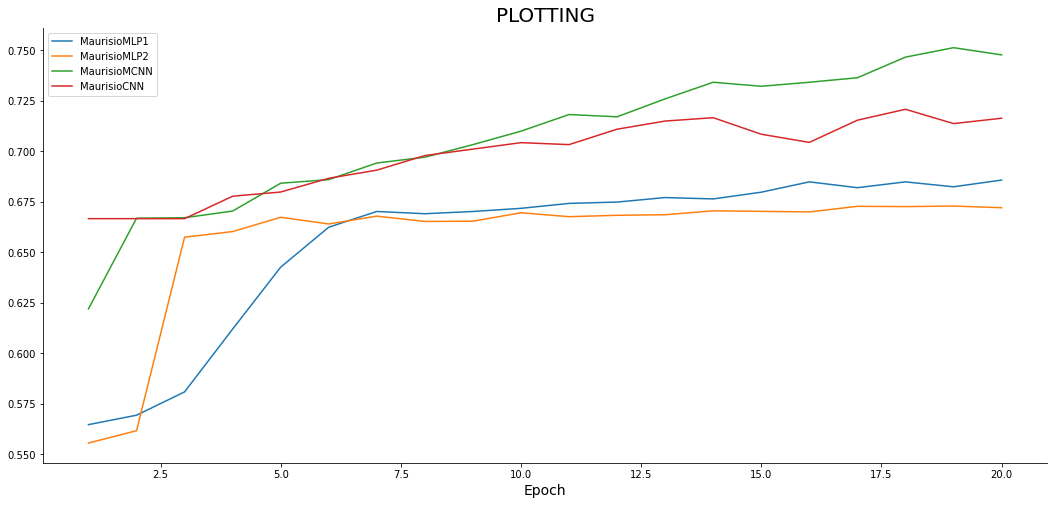

In [18]:

from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.plot(np.arange(1, 21), history_1.history['accuracy'], label='MaurisioMLP1')
plt.plot(np.arange(1, 21), history_1.history['val_accuracy'], label='MaurisioMLP2')
plt.plot(np.arange(1, 21), history_2.history['accuracy'], label='MaurisioMCNN')
plt.plot(np.arange(1, 21), history_2.history['val_accuracy'], label='MaurisioCNN')
plt.title('PLOTTING', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();